# Применение генетического алгоритма и k-Means на искусственных данных

In [ ]:
# импорт библиотек
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from experiment import experiment
import numpy as np
import matplotlib.pyplot as plt

### Разделимые синтетические данные
Для создания разделимых синтетических данных используем 4 нормальных распределения с разными параметрами

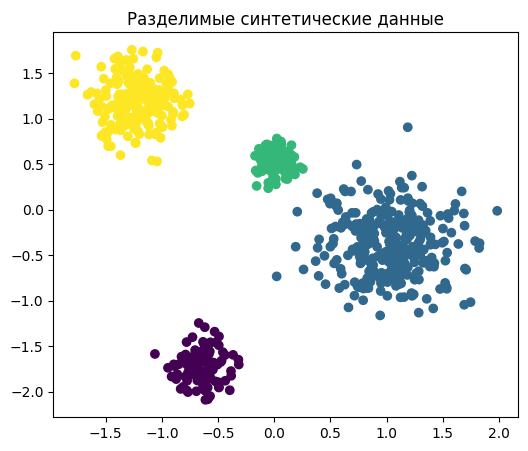

In [ ]:
def generate_non_overlapping_clusters():
    np.random.seed(42)
    cluster1 = np.random.normal(loc=[0, 0], scale=0.8, size=(100, 2))
    cluster2 = np.random.normal(loc=[8, 6], scale=1.5, size=(300, 2))
    cluster3 = np.random.normal(loc=[3, 10], scale=0.5, size=(100, 2))
    cluster4 = np.random.normal(loc=[-3, 13], scale=1.0, size=(200, 2))
    X = np.vstack([cluster1, cluster2, cluster3, cluster4])
    y = np.array([0] * 100 + [1] * 300 + [2] * 100 + [3] * 200)
    return X, y


X1, y1 = generate_non_overlapping_clusters()
X1_scaled = StandardScaler().fit_transform(X1)
plt.figure(figsize=(6, 5))
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=y1, cmap="viridis")
plt.title("Разделимые синтетические данные")
plt.show()

In [ ]:
results, labels = experiment(4, 20, X1_scaled, y1)

In [ ]:
results.head()

,ARI (GA),ARI (KMeans)
0,0.969596,0.951059
1,0.951059,0.951059
2,0.958430,0.951059
3,0.954737,0.951059
4,0.943748,0.951059


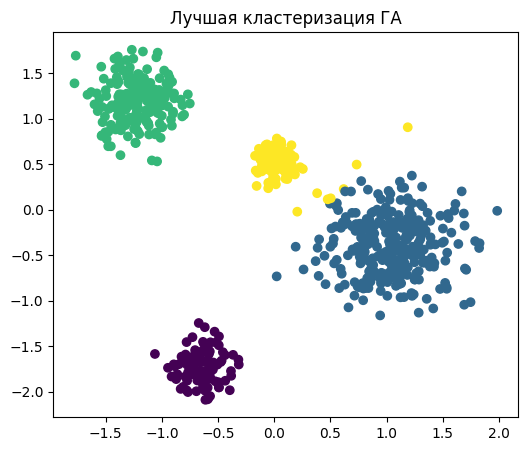

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=labels, cmap="viridis")
plt.title("Лучшая кластеризация ГА")
plt.show()

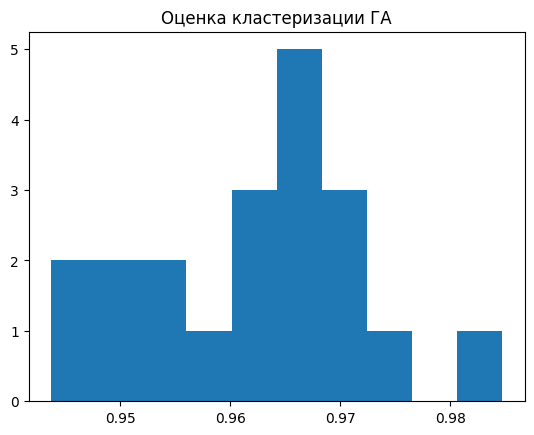

In [ ]:
plt.hist(results["ARI (GA)"])
plt.title("Оценка кластеризации ГА")
plt.show()

In [ ]:
p_value = shapiro(results["ARI (GA)"]).pvalue
print(f"Результаты имеют нормальное распределение: {p_value}")

print(
    f"\nСреднее значение для ГА: {np.mean(results['ARI (GA)'])}; стандартное отклонение: {np.std(results['ARI (GA)'], ddof=1)}"
)
print(
    f"Среднее значение для KMeans: {np.mean(results['ARI (KMeans)'])}; стандартное отклонение: {np.std(results['ARI (KMeans)'], ddof=1)}"
)


print(f"\nЛучшая оценка GA:{max(results['ARI (GA)'])}")
print(f"Лучшая оценка KMeans:{max(results['ARI (KMeans)'])}")

Результаты имеют нормальное распределение: 0.5926775314260311

Среднее значение для ГА: 0.9621660707247186; стандартное отклонение: 0.009726180615618687
Среднее значение для KMeans: 0.9510587236614404; стандартное отклонение: 2.278129578503827e-16

Лучшая оценка GA:0.9846865629091974
Лучшая оценка KMeans:0.9510587236614404


### Неразделимые синтетические данные
Для создания неразделимых синтетических данных используем 3 нормальных распределения с разными параметрами.

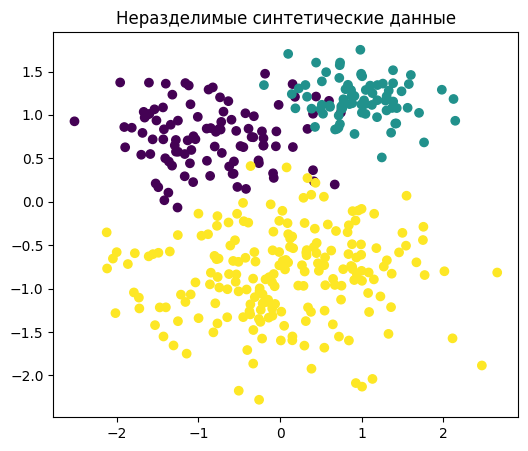

In [ ]:
def generate_overlapping_clusters():
    np.random.seed(0)
    size1 = 100
    size2 = 80
    size3 = 200
    cluster1 = np.random.normal(loc=[0, 1], scale=0.7, size=(size1, 2))
    cluster2 = np.random.normal(loc=[2, 2], scale=0.5, size=(size2, 2))
    cluster3 = np.random.normal(loc=[1, -2], scale=1.0, size=(size3, 2))
    X = np.vstack([cluster1, cluster2, cluster3])
    y = np.array([0] * size1 + [1] * size2 + [2] * size3)
    return X, y


X2, y2 = generate_overlapping_clusters()
X2_scaled = StandardScaler().fit_transform(X2)
plt.figure(figsize=(6, 5))
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2, cmap="viridis")
plt.title("Неразделимые синтетические данные")
plt.show()

In [ ]:
results_overlap, labels_overlap = experiment(3, 20, X2_scaled, y2)

In [ ]:
results_overlap.head()

,ARI (GA),ARI (KMeans)
0,0.798921,0.597474
1,0.626682,0.662690
2,0.642930,0.662690
3,0.663864,0.662690
4,0.680821,0.597474


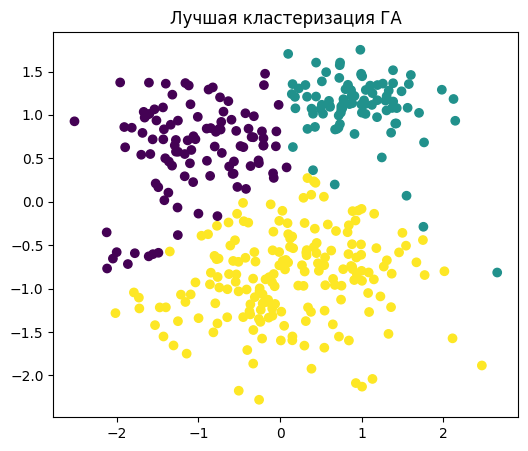

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=labels_overlap, cmap="viridis")
plt.title("Лучшая кластеризация ГА")
plt.show()

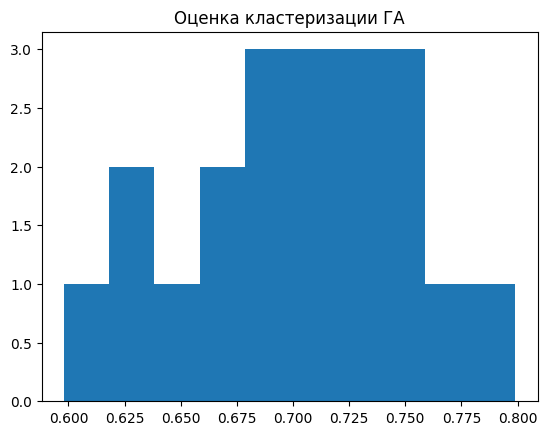

In [ ]:
plt.hist(results_overlap["ARI (GA)"])
plt.title("Оценка кластеризации ГА")
plt.show()

In [ ]:
p_value = shapiro(results_overlap["ARI (GA)"]).pvalue
print(f"Результаты имеют нормальное распределение: {p_value}")

print(
    f"\nСреднее значение для ГА: {np.mean(results_overlap['ARI (GA)'])}; стандартное отклонение: {np.std(results_overlap['ARI (GA)'], ddof=1)}"
)
print(
    f"Среднее значение для KMeans: {np.mean(results_overlap['ARI (KMeans)'])}; стандартное отклонение: {np.std(results_overlap['ARI (KMeans)'], ddof=1)}"
)


print(f"\nЛучшая оценка GA:{max(results_overlap['ARI (GA)'])}")
print(f"Лучшая оценка KMeans:{max(results_overlap['ARI (KMeans)'])}")

Результаты имеют нормальное распределение: 0.9713367378621709

Среднее значение для ГА: 0.7009648578574235; стандартное отклонение: 0.05305847710104702
Среднее значение для KMeans: 0.6340445678794278; стандартное отклонение: 0.0385565379016873

Лучшая оценка GA:0.7989210870438924
Лучшая оценка KMeans:0.6937271932566574
